# EDA 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Cargar y ver datos

In [14]:
# Leer el archivo csv
df = pd.read_csv("./../data/icm-00-23.csv", sep=",")

# Convertir columnas manualmente con control de errores
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')
df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')
df['Totales'] = pd.to_numeric(df['Totales'], errors='coerce')
df['Porcentaje'] = pd.to_numeric(df['Porcentaje'], errors='coerce')
df['Tasa'] = pd.to_numeric(df['Tasa'], errors='coerce')

# Verificar los datos y los tipos de datos
print(df.head())
print(df.dtypes)


      Año              Entidad        Población   Sexo         Edad  \
0  2020.0             NACIONAL  Población total  Total  0 a 17 años   
1  2020.0       AGUASCALIENTES  Población total  Total  0 a 17 años   
2  2020.0      BAJA CALIFORNIA  Población total  Total  0 a 17 años   
3  2020.0  BAJA CALIFORNIA SUR  Población total  Total  0 a 17 años   
4  2020.0             CAMPECHE  Población total  Total  0 a 17 años   

     Cantidad      Totales  Porcentaje  Tasa  
0  38247958.0  126014024.0    0.303521   NaN  
1    463335.0    1425607.0    0.325009   NaN  
2   1061893.0    3769020.0    0.281742   NaN  
3    236629.0     798447.0    0.296362   NaN  
4    286880.0     928363.0    0.309017   NaN  
Año           float64
Entidad        object
Población      object
Sexo           object
Edad           object
Cantidad      float64
Totales       float64
Porcentaje    float64
Tasa          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70741 entries, 0 to 70740
Dat

/var/folders/8v/p9jmdytd6y36kdsq55l4_cqw0000gn/T/ipykernel_99636/1994957750.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/icm-00-23.csv", sep=",")


Año               9
Entidad           0
Población         0
Sexo              0
Edad           3696
Cantidad      28865
Totales       33088
Porcentaje    14632
Tasa          57640
dtype: int64

In [15]:
# Vistazo general de los datos
df.describe()
df.info()
df.shape
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70741 entries, 0 to 70740
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         70732 non-null  float64
 1   Entidad     70741 non-null  object 
 2   Población   70741 non-null  object 
 3   Sexo        70741 non-null  object 
 4   Edad        67045 non-null  object 
 5   Cantidad    41876 non-null  float64
 6   Totales     37653 non-null  float64
 7   Porcentaje  56109 non-null  float64
 8   Tasa        13101 non-null  float64
dtypes: float64(5), object(4)
memory usage: 4.9+ MB


Año               9
Entidad           0
Población         0
Sexo              0
Edad           3696
Cantidad      28865
Totales       33088
Porcentaje    14632
Tasa          57640
dtype: int64

In [18]:
for column in df.columns:
    print(column, df[column].unique().tolist())
    



Año [2020.0, 2015.0, 2010.0, 2018.0, 2016.0, 2014.0, 2012.0, 2008.0, 2019.0, 2017.0, 2013.0, 2011.0, 2009.0, nan, 1994.0, 2002.0, 2006.0, 2001.0, 2005.0, 2007.0, 2021.0, 2000.0, 2004.0, 2003.0, 1964.0, 1971.0, 1974.0, 1975.0, 1977.0, 1981.0, 1987.0, 1988.0, 1989.0, 1992.0, 1993.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2022.0, 2023.0]
Entidad ['NACIONAL', 'AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'CAMPECHE', 'COAHUILA', 'COLIMA', 'CHIAPAS', 'CHIHUAHUA', 'CIUDAD DE MÉXICO', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO', 'JALISCO', 'MÉXICO', 'MICHOACÁN', 'MORELOS', 'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERÉTARO', 'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO', 'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS']
Población ['Población total', 'Población afrodescendiente', 'Población hablante de lengua indígena', 'Población con discapacidad', 'Población sin afiliación a servicio de salud', 'Población casada o en unión libre', 'No dis

In [20]:

# Identificar variables numéricas y categóricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Crear DataFrames separados para cada tipo
df_numericas = df[variables_numericas]
df_categoricas = df[variables_categoricas]

print("Variables Numéricas:")
print(df_numericas.head())

print("Variables Categóricas:")
print(df_categoricas.head())



Variables Numéricas:
      Año    Cantidad      Totales  Porcentaje  Tasa
0  2020.0  38247958.0  126014024.0    0.303521   NaN
1  2020.0    463335.0    1425607.0    0.325009   NaN
2  2020.0   1061893.0    3769020.0    0.281742   NaN
3  2020.0    236629.0     798447.0    0.296362   NaN
4  2020.0    286880.0     928363.0    0.309017   NaN
Variables Categóricas:
               Entidad        Población   Sexo         Edad
0             NACIONAL  Población total  Total  0 a 17 años
1       AGUASCALIENTES  Población total  Total  0 a 17 años
2      BAJA CALIFORNIA  Población total  Total  0 a 17 años
3  BAJA CALIFORNIA SUR  Población total  Total  0 a 17 años
4             CAMPECHE  Población total  Total  0 a 17 años


## Análisis de variables numéricas

                Año      Cantidad       Totales    Porcentaje          Tasa
count  70732.000000  4.187600e+04  3.765300e+04  56109.000000  13101.000000
mean    2013.052550  1.138808e+05  5.481165e+05      0.212622      7.643562
std        6.089577  8.624998e+05  2.717273e+06      0.198696      8.905212
min     1964.000000  0.000000e+00  0.000000e+00      0.000000     -2.681314
25%     2010.000000  5.600000e+01  8.099000e+03      0.052815      1.728221
50%     2014.000000  1.671000e+03  1.093020e+05      0.157571      4.737835
75%     2018.000000  3.254150e+04  3.377880e+05      0.313910     12.812400
max     2023.000000  3.922674e+07  1.260140e+08      1.000000    202.298414
                 Año  Cantidad   Totales  Porcentaje      Tasa
Año         1.000000 -0.000837 -0.025823   -0.174720  0.076382
Cantidad   -0.000837  1.000000  0.717303    0.147634  0.104534
Totales    -0.025823  0.717303  1.000000    0.028077 -0.048474
Porcentaje -0.174720  0.147634  0.028077    1.000000       NaN
T

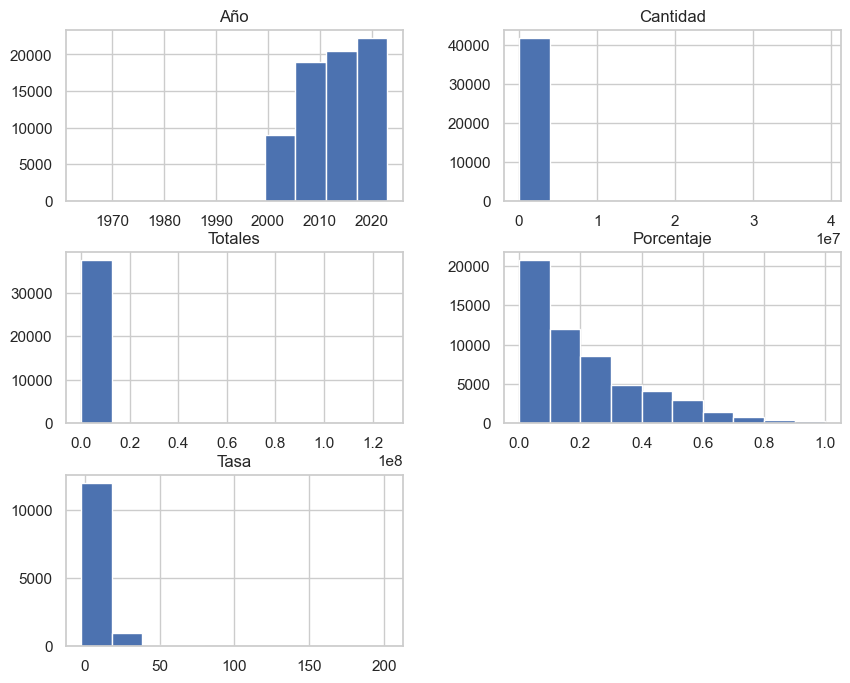

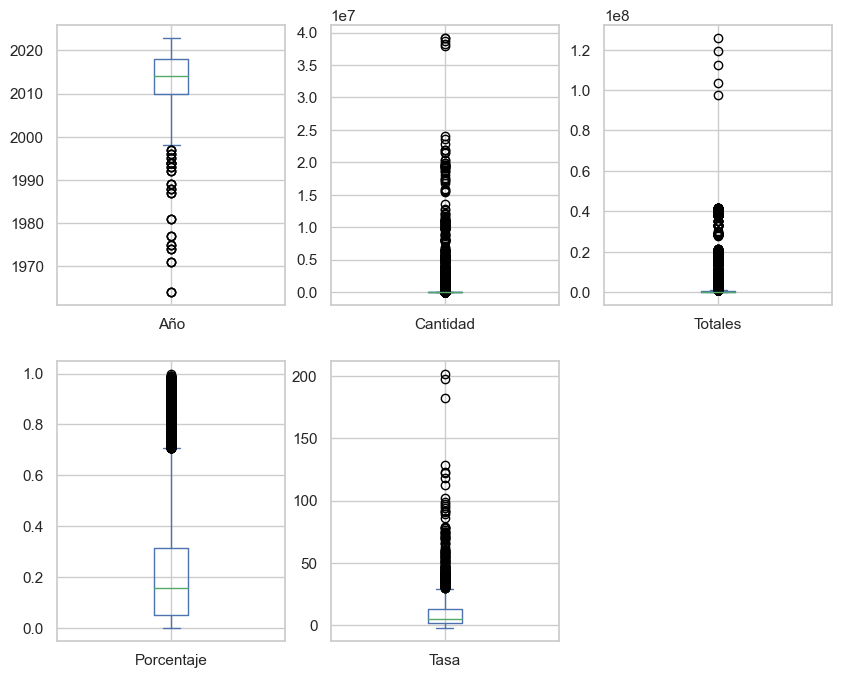

In [23]:
print(df_numericas.describe())
print(df_numericas.corr())

df_numericas.hist(figsize=(10, 8))
plt.show()

df_numericas.plot(kind='box', subplots=True, layout=(2,3), figsize=(10, 8))
plt.show()


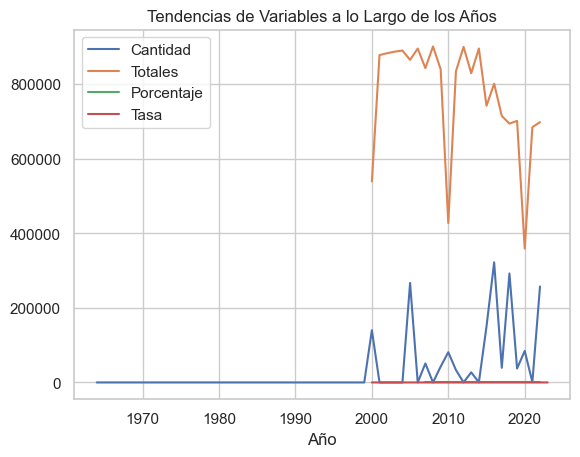

In [24]:
df_numericas.groupby('Año').mean().plot()
plt.title('Tendencias de Variables a lo Largo de los Años')
plt.show()


## Análisis de variables categóricas

In [25]:
for column in df_categoricas.columns:
    print(df_categoricas[column].value_counts())
    print("\n")


NACIONAL               2331
YUCATÁN                2183
CHIAPAS                2177
SAN LUIS POTOSÍ        2135
NUEVO LEÓN             2135
OAXACA                 2135
PUEBLA                 2135
QUERÉTARO              2135
QUINTANA ROO           2135
SONORA                 2135
SINALOA                2135
MORELOS                2135
TABASCO                2135
TAMAULIPAS             2135
TLAXCALA               2135
VERACRUZ               2135
NAYARIT                2135
MICHOACÁN              2135
AGUASCALIENTES         2135
MÉXICO                 2135
JALISCO                2135
HIDALGO                2135
GUERRERO               2135
GUANAJUATO             2135
DURANGO                2135
CIUDAD DE MÉXICO       2135
CHIHUAHUA              2135
COLIMA                 2135
COAHUILA               2135
CAMPECHE               2135
BAJA CALIFORNIA SUR    2135
BAJA CALIFORNIA        2135
ZACATECAS              2135
Name: Entidad, dtype: int64


Defunciones por agresiones                    

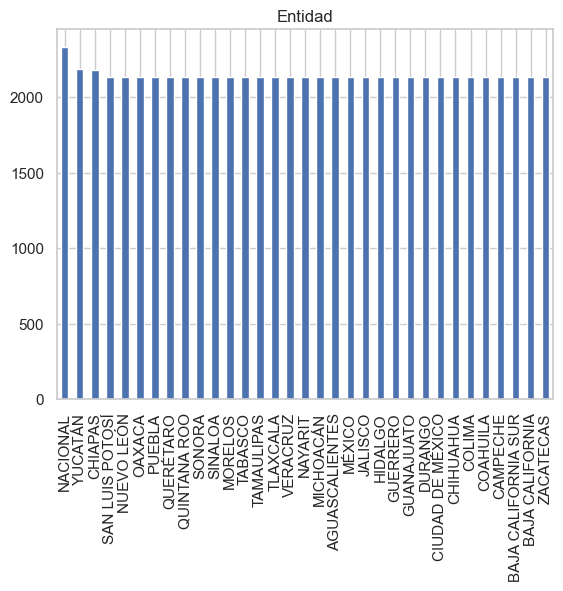

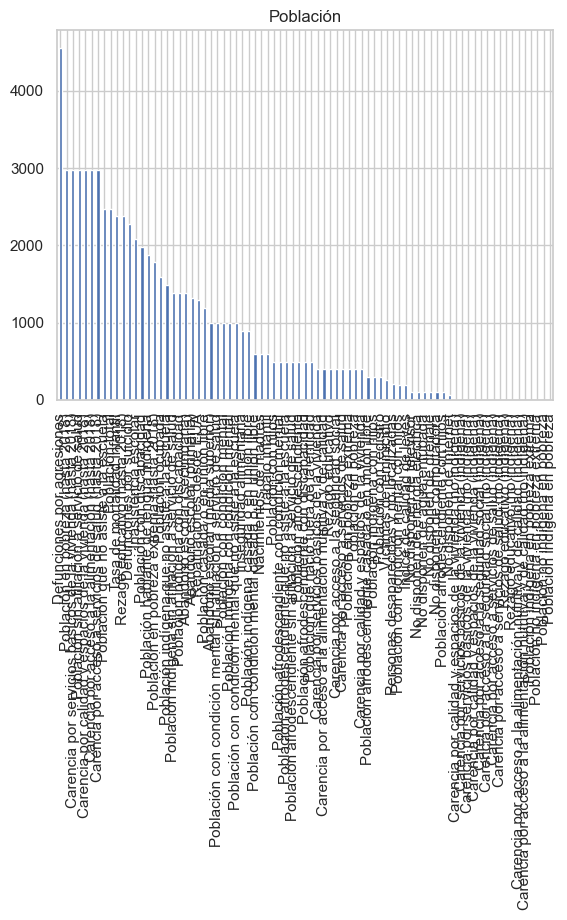

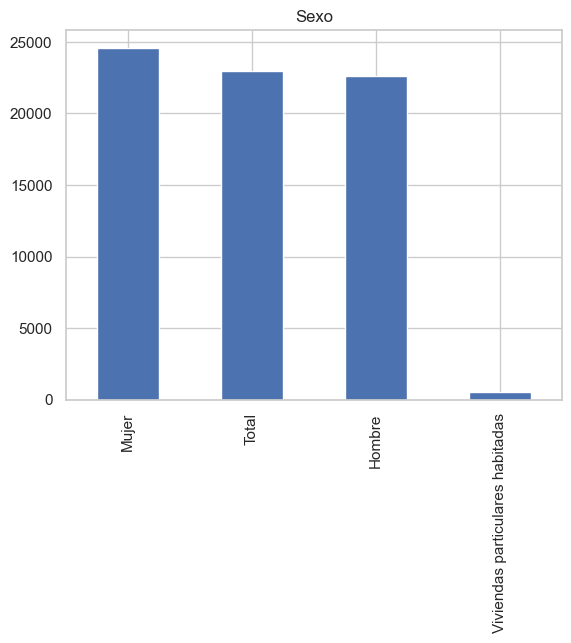

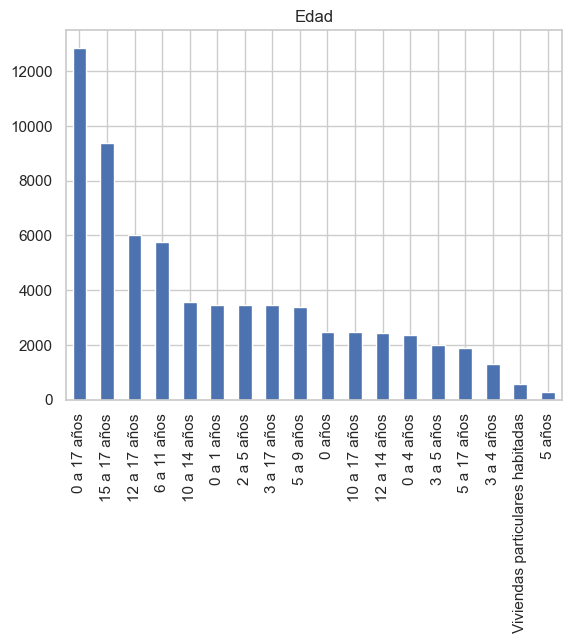

In [26]:
for column in df_categoricas.columns:
    df_categoricas[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()
